In [19]:

import pandas as pd
import glob
import os
import tensorflow as tf

from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2

IMG_SIZE = ( 992,1024)


In [20]:
open("a.xml","w")

<_io.TextIOWrapper name='a.xml' mode='w' encoding='cp1255'>

## Load the dataset

In [22]:
path = "data/"

#for example, this is how we would read one file
data = pd.read_csv('data/17.txt',sep=" ", header = None)
data.columns = ["label", "x1", "x2", "y1","y2" ]
data["img"] = 5
print (data)

def draw_bounding_boxes(im, bbox):
    n = len(bbox)
    for i in range(n):
        _, x1, y1, w, h,_ = bbox.iloc[i]
        x1 *= IMG_SIZE[0]
        w  *= IMG_SIZE[0]
        y1 *= IMG_SIZE[1]
        h  *= IMG_SIZE[1]

        cv2.rectangle(im, (int(x1-w/2), int(y1-h/2)), (int(x1 + w/2) , int(y1+h/2)), (255,0,0), 4)

im = plt.imread("data/17.bmp")
im = 255 - np.stack((im,)*3, axis=-1)
#draw_bounding_boxes(im,data)
plt.imshow(im)


    label        x1      x2        y1        y2  img
0       0  0.037144  0.8125  0.074288  0.259492    5
1       0  0.165431  0.8125  0.097714  0.259492    5
2       0  0.305431  0.8125  0.097714  0.259492    5
3       0  0.445431  0.8125  0.097714  0.259492    5
4       0  0.585431  0.8125  0.097714  0.259492    5
5       0  0.725431  0.8125  0.097714  0.259492    5
6       0  0.865431  0.8125  0.097714  0.259492    5
7       0  0.978287  0.8125  0.043426  0.259492    5
8       0  0.101374  0.8500  0.021600  0.029805    5
9       0  0.381374  0.3000  0.021600  0.029805    5
10      0  0.661374  0.7125  0.021600  0.029805    5
11      0  0.941374  0.0250  0.021600  0.029805    5
12      0  0.721884  0.3750  0.000840  0.414062    5
13      0  0.829997  0.3750  0.000840  0.414062    5
14      0  0.934427  0.3750  0.000840  0.414062    5
15      0  0.350426  0.7500  0.003360  0.103516    5
16      0  0.444943  0.7500  0.003360  0.103516    5
17      0  0.461243  0.7500  0.003360  0.10351

FileNotFoundError: [Errno 2] No such file or directory: 'data/17.bmp'

In [23]:
all_files = glob.glob(os.path.join(path, "*.txt"))

#create a list of all tables
li = []

# read each table, and append list
for i,f in enumerate(all_files):
    df = pd.read_csv(f,sep=" ", header = None)
    df.columns = ["label", "x", "y", "w","h" ]
    df["img"] = f[5:-4]
    li.append(df)


# unify into one table
df = pd.concat(li, axis=0, ignore_index=False)

display(df)

,label,x,y,w,h,img
0,0,0.041858,0.375000,0.083716,0.259492,0
1,0,0.174859,0.375000,0.097714,0.259492,0
2,0,0.314859,0.375000,0.097714,0.259492,0
3,0,0.454859,0.375000,0.097714,0.259492,0
4,0,0.594859,0.375000,0.097714,0.259492,0
...,...,...,...,...,...,...
24,0,0.975978,0.875000,0.003360,0.103516,99
25,0,0.226536,0.766667,0.237503,0.275803,99
26,0,0.710628,0.500000,0.237503,0.275803,99
27,0,0.701236,0.500000,0.132930,0.847160,99


In [24]:
li = sorted(li,key= lambda d: int(d["img"][0]))

In [26]:
# load image
im = plt.imread("data/2.bmp")
im = 255 - np.stack((im,)*3, axis=-1)

# x: width
# y: height
bbox_7 = df.loc[df['img'] == "2"]

display(bbox_7)



def draw_bounding_boxes(im, bbox):
    n = len(bbox)
    for i in range(n):
        _, x1, y1, w, h,_ = bbox.iloc[i]
        x1 *= IMG_SIZE[0]
        w  *= IMG_SIZE[0]
        y1 *= IMG_SIZE[1]
        h  *= IMG_SIZE[1]

        cv2.rectangle(im, (int(x1-w/2), int(y1-h/2)), (int(x1 + w/2) , int(y1+h/2)), (255,0,0), 4)


draw_bounding_boxes(im,bbox_7)

plt.imshow(im)



FileNotFoundError: [Errno 2] No such file or directory: 'data/2.bmp'

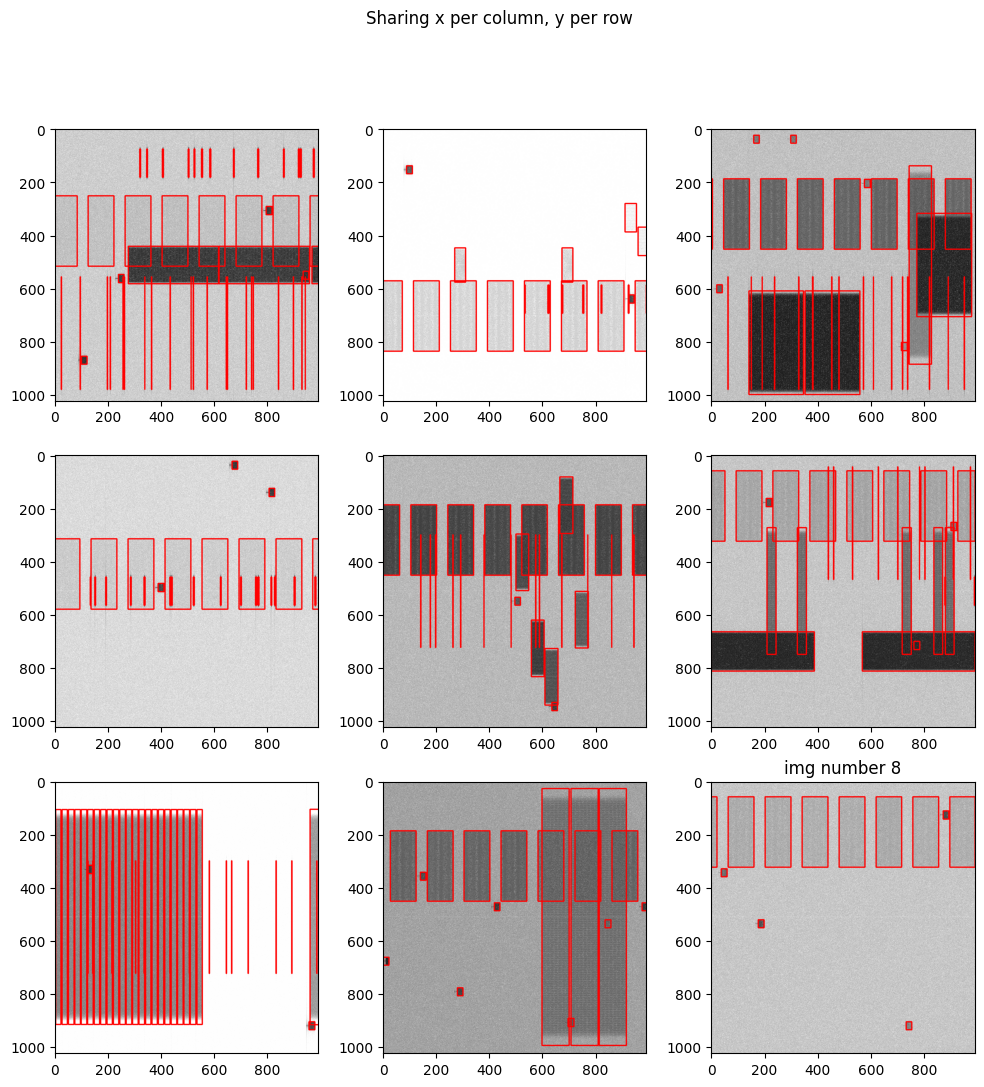

In [28]:
n = 3

fig, axs = plt.subplots(n, n, figsize= (12,12))
fig.suptitle('Sharing x per column, y per row')

for i in range(n**2):
    # load image
    im = plt.imread(f"data/{i}.bmp")
    im = 255 - np.stack((im,)*3, axis=-1)

    bbox_i = df.loc[df['img'] == f"{i}"]
    draw_bounding_boxes(im,bbox_i)

    axs[i//n,i%n].imshow(im)
    plt.title(f"img number {i}")


## Format conversion

convert dataset to .xml format for later use

In [ ]:
from PIL import Image

In [ ]:

for df_i in li:
    n = df_i["img"][0]

    img = Image.open(f'data/xml/{n}.bmp')
    img.save( f'data/xml/{n}.jpg')

In [ ]:
from pascal_voc_writer import Writer
H,W = IMG_SIZE

def df_to_pascal_xml(li):
    for df_i in li:
        n = df_i["img"][0]



        # get data
        df_i["xmin"] = (df_i["x"] - df_i["w"]/2)*W
        df_i["xmax"] = (df_i["x"] + df_i["w"]/2)*W
        df_i["ymin"] = (df_i["y"] - df_i["h"]/2)*H
        df_i["ymax"] = (df_i["y"] + df_i["h"]/2)*H

        df_i = df_i.drop(['x','y','w','h'],axis=1)

        print(len(df_i))

        # create pascal voc writer (image_path, width, height)
        path = f'data/{n}'
        writer = Writer(f'{path}.jpg', W, H)

        # add objects (class, xmin, ymin, xmax, ymax)
        for i,box in df_i.iterrows():
            writer.addObject("1", int(df_i["xmin"][i]), int(df_i["ymin"][i]), int(df_i["xmax"][i]),int(df_i["ymax"][i]))
            print(f'img {n}: {i} added')
        # write to file

        writer.save(f'data/xml/{df_i["img"][0]}.xml')


## Transfer learning implementation / Bench Mark

right off the bet let's try implementing one of the early YOLO versions to get an idea of our benchmark's precision and performance


In [ ]:
import numpy as np
import os

from tflite_model_maker.config import ExportFormat, QuantizationConfig
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

from tflite_support import metadata

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

In [ ]:
train_data = object_detector.DataLoader.from_pascal_voc(
    'data/train',
    'data/train',
    ['1']
)

val_data = object_detector.DataLoader.from_pascal_voc(
    'data/validate',
    'data/validate',
    ['android', 'pig_android']
)

## building our own little YOLO Net




In [ ]:
def fixed_padding(inputs, kernel_size, data_format):
    """ResNet implementation of fixed padding.

    Pads the input along the spatial dimensions independently of input size.

    Args:
        inputs: Tensor input to be padded.
        kernel_size: The kernel to be used in the conv2d or max_pool2d.
        data_format: The input format.
    Returns:
        A tensor with the same format as the input.
    """
    pad_total = kernel_size - 1
    pad_beg = pad_total // 2
    pad_end = pad_total - pad_beg

    if data_format == 'channels_first':
        padded_inputs = tf.pad(inputs, [[0, 0], [0, 0],
                                        [pad_beg, pad_end],
                                        [pad_beg, pad_end]])
    else:
        padded_inputs = tf.pad(inputs, [[0, 0], [pad_beg, pad_end],
                                        [pad_beg, pad_end], [0, 0]])
    return padded_inputs

def conv2d_fixed_padding(inputs, filters, kernel_size, data_format, strides=1):
    """Strided 2-D convolution with explicit padding."""
    if strides > 1:
        inputs = fixed_padding(inputs, kernel_size, data_format)

    return tf.layers.conv2d(
        inputs=inputs, filters=filters, kernel_size=kernel_size,
        strides=strides, padding=('SAME' if strides == 1 else 'VALID'),
        use_bias=False, data_format=data_format)

In [ ]:
model = models.Sequential()
# Block 1:
model.add(layers.Conv2D(64, (7, 7),strides=2, padding='same', activation='relu', input_shape=(448, 448, 3)))
model.add(layers.MaxPooling2D((2, 2),strides=2))

# Block 2:
model.add(layers.Conv2D(192, (3, 3), activation='relu',padding='same', name = "BLOCK2"))
model.add(layers.MaxPooling2D((2, 2),strides=2))

# Block 3:
model.add(layers.Conv2D(128, (1, 1), activation='relu',padding='same', name = 'BLOCK3'))
model.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
model.add(layers.Conv2D(256, (1, 1), activation='relu',padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same'))

model.add(layers.MaxPooling2D((2, 2),strides=2))

# Block 4:
for i in range(4):
    model.add(layers.Conv2D(256, (1, 1), activation='relu',padding='same',name = f'BLOCK4_{i}'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same'))

model.add(layers.Conv2D(512, (1, 1), activation='relu',padding='same'))
model.add(layers.Conv2D(1024, (3, 3), activation='relu',padding='same'))

model.add(layers.MaxPooling2D((2, 2),strides=2))

for i in range(2):
    model.add(layers.Conv2D(256, (1, 1), activation='relu',padding='same',name = f'BLOCK5_{i}'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same'))


model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))

model.add(layers.Dense(1024))

In [ ]:
model.summary()

In [ ]:
def custom_loss(y_true, y_pred):
    mask_shape = tf.shape(y_true)[:4]

    cell_x = tf.to_float(tf.reshape(tf.tile(tf.range(GRID_W), [GRID_H]), (1, GRID_H, GRID_W, 1, 1)))
    cell_y = tf.transpose(cell_x, (0,2,1,3,4))

    cell_grid = tf.tile(tf.concat([cell_x,cell_y], -1), [BATCH_SIZE, 1, 1, 5, 1])

    coord_mask = tf.zeros(mask_shape)
    conf_mask  = tf.zeros(mask_shape)
    class_mask = tf.zeros(mask_shape)

    seen = tf.Variable(0.)
    total_recall = tf.Variable(0.)

    """
    Adjust prediction
    """
    ### adjust x and y
    pred_box_xy = tf.sigmoid(y_pred[..., :2]) + cell_grid

    ### adjust w and h
    pred_box_wh = tf.exp(y_pred[..., 2:4]) * np.reshape(ANCHORS, [1,1,1,BOX,2])

    ### adjust confidence
    pred_box_conf = tf.sigmoid(y_pred[..., 4])

    ### adjust class probabilities
    pred_box_class = y_pred[..., 5:]

    """
    Adjust ground truth
    """
    ### adjust x and y
    true_box_xy = y_true[..., 0:2] # relative position to the containing cell

    ### adjust w and h
    true_box_wh = y_true[..., 2:4] # number of cells accross, horizontally and vertically

    ### adjust confidence
    true_wh_half = true_box_wh / 2.
    true_mins    = true_box_xy - true_wh_half
    true_maxes   = true_box_xy + true_wh_half

    pred_wh_half = pred_box_wh / 2.
    pred_mins    = pred_box_xy - pred_wh_half
    pred_maxes   = pred_box_xy + pred_wh_half

    intersect_mins  = tf.maximum(pred_mins,  true_mins)
    intersect_maxes = tf.minimum(pred_maxes, true_maxes)
    intersect_wh    = tf.maximum(intersect_maxes - intersect_mins, 0.)
    intersect_areas = intersect_wh[..., 0] * intersect_wh[..., 1]

    true_areas = true_box_wh[..., 0] * true_box_wh[..., 1]
    pred_areas = pred_box_wh[..., 0] * pred_box_wh[..., 1]

    union_areas = pred_areas + true_areas - intersect_areas
    iou_scores  = tf.truediv(intersect_areas, union_areas)

    true_box_conf = iou_scores * y_true[..., 4]

    ### adjust class probabilities
    true_box_class = tf.argmax(y_true[..., 5:], -1)

    """
    Determine the masks
    """
    ### coordinate mask: simply the position of the ground truth boxes (the predictors)
    coord_mask = tf.expand_dims(y_true[..., 4], axis=-1) * COORD_SCALE

    ### confidence mask: penelize predictors + penalize boxes with low IOU
    # penalize the confidence of the boxes, which have IOU with some ground truth box < 0.6
    true_xy = true_boxes[..., 0:2]
    true_wh = true_boxes[..., 2:4]

    true_wh_half = true_wh / 2.
    true_mins    = true_xy - true_wh_half
    true_maxes   = true_xy + true_wh_half

    pred_xy = tf.expand_dims(pred_box_xy, 4)
    pred_wh = tf.expand_dims(pred_box_wh, 4)

    pred_wh_half = pred_wh / 2.
    pred_mins    = pred_xy - pred_wh_half
    pred_maxes   = pred_xy + pred_wh_half

    intersect_mins  = tf.maximum(pred_mins,  true_mins)
    intersect_maxes = tf.minimum(pred_maxes, true_maxes)
    intersect_wh    = tf.maximum(intersect_maxes - intersect_mins, 0.)
    intersect_areas = intersect_wh[..., 0] * intersect_wh[..., 1]

    true_areas = true_wh[..., 0] * true_wh[..., 1]
    pred_areas = pred_wh[..., 0] * pred_wh[..., 1]

    union_areas = pred_areas + true_areas - intersect_areas
    iou_scores  = tf.truediv(intersect_areas, union_areas)

    best_ious = tf.reduce_max(iou_scores, axis=4)
    conf_mask = conf_mask + tf.to_float(best_ious < 0.6) * (1 - y_true[..., 4]) * NO_OBJECT_SCALE

    # penalize the confidence of the boxes, which are reponsible for corresponding ground truth box
    conf_mask = conf_mask + y_true[..., 4] * OBJECT_SCALE

    ### class mask: simply the position of the ground truth boxes (the predictors)
    class_mask = y_true[..., 4] * tf.gather(CLASS_WEIGHTS, true_box_class) * CLASS_SCALE

    """
    Warm-up training
    """
    no_boxes_mask = tf.to_float(coord_mask < COORD_SCALE/2.)
    seen = tf.assign_add(seen, 1.)

    true_box_xy, true_box_wh, coord_mask = tf.cond(tf.less(seen, WARM_UP_BATCHES),
                                                   lambda: [true_box_xy + (0.5 + cell_grid) * no_boxes_mask,
                                                            true_box_wh + tf.ones_like(true_box_wh) * np.reshape(ANCHORS, [1,1,1,BOX,2]) * no_boxes_mask,
                                                            tf.ones_like(coord_mask)],
                                                   lambda: [true_box_xy,
                                                            true_box_wh,
                                                            coord_mask])

    """
    Finalize the loss
    """
    nb_coord_box = tf.reduce_sum(tf.to_float(coord_mask > 0.0))
    nb_conf_box  = tf.reduce_sum(tf.to_float(conf_mask  > 0.0))
    nb_class_box = tf.reduce_sum(tf.to_float(class_mask > 0.0))

    loss_xy    = tf.reduce_sum(tf.square(true_box_xy-pred_box_xy)     * coord_mask) / (nb_coord_box + 1e-6) / 2.
    loss_wh    = tf.reduce_sum(tf.square(true_box_wh-pred_box_wh)     * coord_mask) / (nb_coord_box + 1e-6) / 2.
    loss_conf  = tf.reduce_sum(tf.square(true_box_conf-pred_box_conf) * conf_mask)  / (nb_conf_box  + 1e-6) / 2.
    loss_class = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=true_box_class, logits=pred_box_class)
    loss_class = tf.reduce_sum(loss_class * class_mask) / (nb_class_box + 1e-6)

    loss = loss_xy + loss_wh + loss_conf + loss_class

    nb_true_box = tf.reduce_sum(y_true[..., 4])
    nb_pred_box = tf.reduce_sum(tf.to_float(true_box_conf > 0.5) * tf.to_float(pred_box_conf > 0.3))

    """
    Debugging code
    """
    current_recall = nb_pred_box/(nb_true_box + 1e-6)
    total_recall = tf.assign_add(total_recall, current_recall)

    loss = tf.Print(loss, [tf.zeros((1))], message='Dummy Line \t', summarize=1000)
    loss = tf.Print(loss, [loss_xy], message='Loss XY \t', summarize=1000)
    loss = tf.Print(loss, [loss_wh], message='Loss WH \t', summarize=1000)
    loss = tf.Print(loss, [loss_conf], message='Loss Conf \t', summarize=1000)
    loss = tf.Print(loss, [loss_class], message='Loss Class \t', summarize=1000)
    loss = tf.Print(loss, [loss], message='Total Loss \t', summarize=1000)
    loss = tf.Print(loss, [current_recall], message='Current Recall \t', summarize=1000)
    loss = tf.Print(loss, [total_recall/seen], message='Average Recall \t', summarize=1000)

    return loss

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))